In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

/home/ask149/env/gen/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
dataset = pd.read_csv('User_Data.csv') 

In [47]:
# input 
x = dataset.iloc[:, [2, 3]].values 

# output 
y = dataset.iloc[:, 4].values 

In [48]:
dataset.info()
# label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [42]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.25, random_state = 0) 

In [45]:
# from sklearn.preprocessing import StandardScaler 
# sc_x = StandardScaler() 
# xtrain = sc_x.fit_transform(xtrain) 
# xtest = sc_x.transform(xtest) 

# print (xtrain[0:10, :]) 

In [46]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 32) 
classifier.fit(xtrain, ytrain) 

ValueError: could not convert string to float: 'Female'

In [33]:
xtest.shape

(100, 2)

In [34]:
y_pred = classifier.predict(xtest) 

In [35]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 

print ("Confusion Matrix : \n", cm) 




Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [36]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.89


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


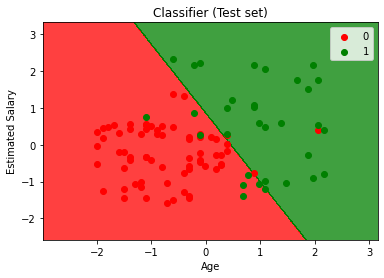

In [37]:
from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
stop = X_set[:, 0].max() + 1, step = 0.01), 
np.arange(start = X_set[:, 1].min() - 1, 
stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict( 
            np.array([X1.ravel(), X2.ravel()]).T).reshape( 
            X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
    c = ListedColormap(('red', 'green'))(i), label = j) 

plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show() 